In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [62]:
sns.set_theme()

In [63]:
data = pd.read_csv('../Data/SQLout_employees.csv')

In [64]:
data2018ft = data.query('arrangement == "FT" & year==2018')[['nace',
                          'esize_class',  'collective',  'gender',
                          'age_class', 'lpk',  'education', 'hourly_rate']]

In [65]:
def hr_in_categories(dataframe, column):
    """function to estimate if categorical feature is
     an important predictor and if it can be reclassified"""
    sns.boxplot(data=dataframe, x=column, y='hourly_rate')
    plt.ylim(0, 15)
    plt.show();
    tukey = pairwise_tukeyhsd(endog=dataframe['hourly_rate'], 
                        groups=dataframe[column], alpha=0.05)
    print(tukey)
    count = dataframe[column].value_counts()
    print('Value Counts:', count, sep='\n')

# 'hourly_rate' variation in predictor groups

## 'esize_class'

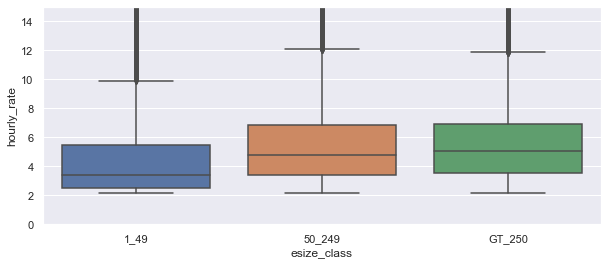

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
  1_49 50_249   1.1461   -0.0  1.0218 1.2703   True
  1_49 GT_250   1.1105   -0.0  0.9942 1.2268   True
50_249 GT_250  -0.0356 0.7244 -0.1445 0.0734  False
---------------------------------------------------
Value Counts:
GT_250    15966
50_249    11525
1_49       9294
Name: esize_class, dtype: int64


In [66]:
hr_in_categories(data2018ft, 'esize_class')

In [67]:
reclassify = { '1_49': 0, '50_249': 1, 'GT_250': 1}
data2018ft['esize_class_nc']=data2018ft['esize_class'].replace(reclassify)

## 'collective'

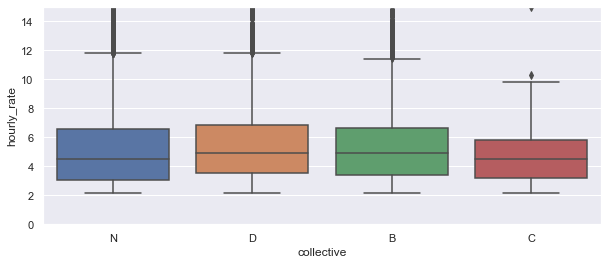

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
     B      C  -0.6311 0.3155 -1.5762   0.314  False
     B      D   0.2036 0.1214 -0.0335  0.4406  False
     B      N   -0.094 0.6759 -0.3092  0.1212  False
     C      D   0.8347 0.0964 -0.0948  1.7641  False
     C      N   0.5371 0.4417 -0.3871  1.4612  False
     D      N  -0.2976    0.0  -0.428 -0.1672   True
----------------------------------------------------
Value Counts:
N    27190
D     7213
B     2268
C      114
Name: collective, dtype: int64


In [68]:
hr_in_categories(data2018ft, 'collective')

Can be droped.

In [69]:
data2018ft.drop(columns='collective', inplace=True)

## 'gender'

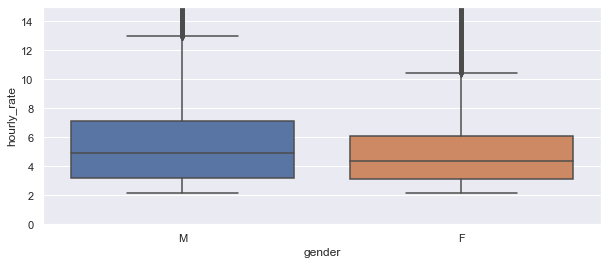

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj lower  upper  reject
-------------------------------------------------
     F      M   0.8066  -0.0 0.7283 0.8848   True
-------------------------------------------------
Value Counts:
M    19974
F    16811
Name: gender, dtype: int64


In [70]:
hr_in_categories(data2018ft, 'gender')

## 'age_class'

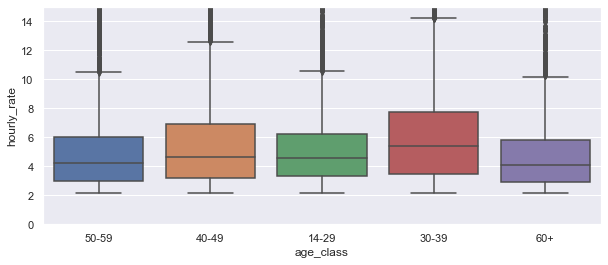

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
 14-29  30-39   1.2492    0.0  1.0861  1.4124   True
 14-29  40-49   0.6221    0.0  0.4595  0.7848   True
 14-29  50-59  -0.0887 0.5594 -0.2494  0.0721  False
 14-29    60+  -0.1999 0.0558 -0.4028   0.003  False
 30-39  40-49  -0.6271    0.0 -0.7893 -0.4649   True
 30-39  50-59  -1.3379    0.0 -1.4981 -1.1777   True
 30-39    60+  -1.4492    0.0 -1.6517 -1.2466   True
 40-49  50-59  -0.7108    0.0 -0.8706  -0.551   True
 40-49    60+  -0.8221    0.0 -1.0242 -0.6199   True
 50-59    60+  -0.1113 0.5539 -0.3118  0.0893  False
----------------------------------------------------
Value Counts:
50-59    8614
40-49    8199
30-39    8108
14-29    8006
60+      3858
Name: age_class, dtype: int64


In [71]:
hr_in_categories(data2018ft, 'age_class')

In [72]:
reclassify = { '14-29': 0, '30-39': 2, '40-49': 1, '50-59': 0, '60+': 0}
data2018ft['age_class_nc']=data2018ft['age_class'].replace(reclassify)

## 'education'

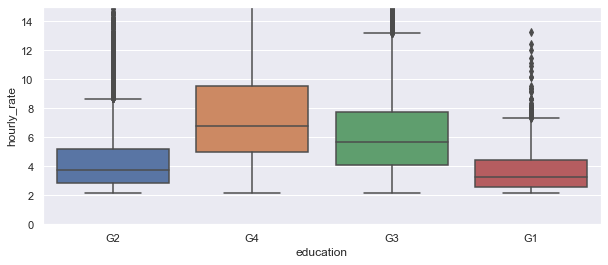

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj lower  upper  reject
-------------------------------------------------
    G1     G2   0.5137   0.0 0.2433 0.7841   True
    G1     G3   2.7877  -0.0 2.5094 3.0659   True
    G1     G4   4.3739  -0.0 4.0892 4.6587   True
    G2     G3   2.2739  -0.0 2.1614 2.3864   True
    G2     G4   3.8602  -0.0 3.7325 3.9879   True
    G3     G4   1.5863  -0.0 1.4427 1.7298   True
-------------------------------------------------
Value Counts:
G2    19371
G3     9559
G4     6680
G1     1175
Name: education, dtype: int64


In [73]:
hr_in_categories(data2018ft, 'education')

In [74]:
reclassify = { 'G1': 0, 'G2': 1, 'G3': 2, 'G4': 3}
data2018ft['education_nc']=data2018ft['education'].replace(reclassify)

## 'nace' (high cardinality )

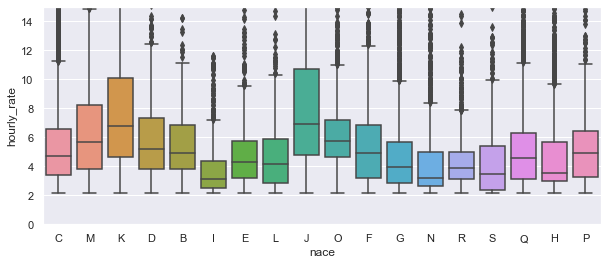

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
     B      C  -0.5978 0.1723 -1.2794  0.0838  False
     B      D  -0.0195    1.0 -0.8301  0.7911  False
     B      E  -1.1563    0.0 -1.9294 -0.3832   True
     B      F  -0.4738 0.7086 -1.2035  0.2559  False
     B      G  -1.1443    0.0 -1.8573 -0.4313   True
     B      H  -1.1689    0.0 -1.8705 -0.4673   True
     B      I  -2.2757    0.0 -3.0526 -1.4987   True
     B      J   2.5323    0.0  1.7981  3.2665   True
     B      K    2.419    0.0  1.6608  3.1772   True
     B      L  -1.1456 0.0013 -2.0475 -0.2438   True
     B      M   0.8912 0.0027   0.162  1.6203   True
     B      N   -1.662    0.0 -2.3826 -0.9413   True
     B      O    0.118    1.0 -0.6011  0.8371  False
     B      P  -0.9081 0.0037  -1.664 -0.1523   True
     B      Q  -0.7209 0.0483 -1.4397 -0.0022   True
     B      R  -1.6703    0.0  -2.444 -0.8966 

In [75]:
hr_in_categories(data2018ft, 'nace')

## 'lpk' (very high cardinality )

In [76]:
data2018ft['lpk1'] = data2018ft['lpk'] // 100
data2018ft['lpk2'] = data2018ft['lpk'] // 10
data2018ft

,nace,esize_class,gender,age_class,lpk,education,hourly_rate,esize_class_nc,age_class_nc,education_nc,lpk1,lpk2
44952,C,1_49,M,50-59,722,G2,8.13,0,0,1,7,72
44953,C,1_49,M,40-49,721,G2,8.20,0,1,1,7,72
44954,C,1_49,M,50-59,722,G2,8.20,0,0,1,7,72
44955,C,1_49,F,40-49,334,G2,2.51,0,1,1,3,33
44956,M,50_249,F,40-49,522,G2,2.19,1,1,1,5,52
...,...,...,...,...,...,...,...,...,...,...,...,...
88111,N,1_49,M,14-29,711,G2,2.84,0,0,1,7,71
88112,N,1_49,M,14-29,711,G2,2.84,0,0,1,7,71
88113,N,1_49,M,30-39,711,G2,2.84,0,2,1,7,71
88114,N,1_49,M,50-59,711,G2,2.84,0,0,1,7,71


In [77]:
lpk_agg = data2018ft.groupby(['lpk1', 'lpk2', 'lpk'])['hourly_rate'].agg(['mean', 'count', 'std']).reset_index()
lpk_agg

,lpk1,lpk2,lpk,mean,count,std
0,0,1,11,9.177500,40,1.595207
1,0,2,21,6.464605,76,0.902824
2,0,3,31,5.234558,147,0.806276
3,1,11,111,10.586421,95,4.772981
4,1,11,112,11.182300,426,10.691471
...,...,...,...,...,...,...
113,9,93,932,3.584442,770,1.417264
114,9,93,933,3.710980,408,1.678172
115,9,94,941,2.891374,131,0.909244
116,9,96,961,2.921058,208,0.881878


In [78]:
lpk2_agg = data2018ft.groupby(['lpk1', 'lpk2'])['hourly_rate'].agg(['mean', 'count', 'std']).reset_index()
lpk2_agg

,lpk1,lpk2,mean,count,std
0,0,1,9.177500,40,1.595207
1,0,2,6.464605,76,0.902824
2,0,3,5.234558,147,0.806276
3,1,11,11.073647,521,9.879051
4,1,12,10.007931,1271,7.144410
5,1,13,9.304674,1395,7.247815
6,1,14,6.939833,299,6.054929
7,2,21,6.940445,1708,3.120070
8,2,22,6.624668,1266,3.365110
9,2,23,5.935569,580,1.442037


In [86]:
sns.set_theme(rc={"figure.figsize":(6, 4)})

### Count

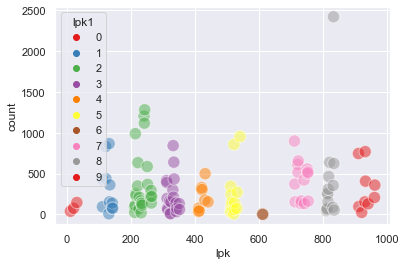

In [87]:
sns.scatterplot(data=lpk_agg, x='lpk', y='count', hue='lpk1', s=150, alpha=0.5,palette='Set1');

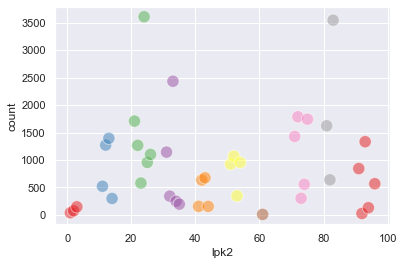

In [88]:
sns.scatterplot(data=lpk2_agg, x='lpk2', y='count',
                 hue='lpk1', s=150, alpha=0.5,palette='Set1', legend=False);

### mean

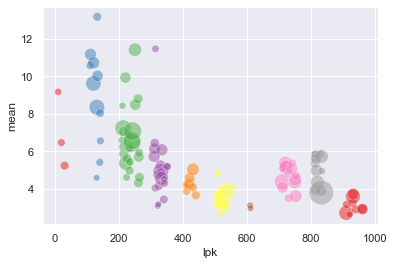

In [89]:
sns.scatterplot(data=lpk_agg, x='lpk', y='mean', hue='lpk1',
                 size='count',sizes=(40, 600), alpha=0.5, palette='Set1', legend=False);

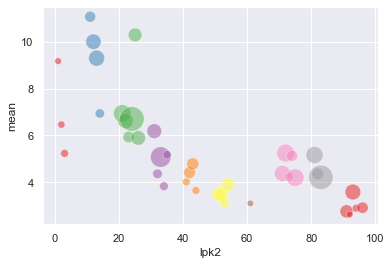

In [90]:
sns.scatterplot(data=lpk2_agg, x='lpk2', y='mean', hue='lpk1', 
                size='count',sizes=(40, 600), alpha=0.5, palette='Set1', legend=False);

### mean vs std

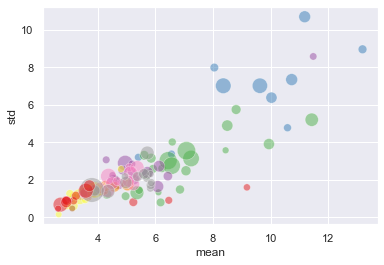

In [91]:
sns.scatterplot(data=lpk_agg, x='mean', y='std', hue='lpk1',
                 size='count',sizes=(40, 600), alpha=0.5, palette='Set1', legend=False);

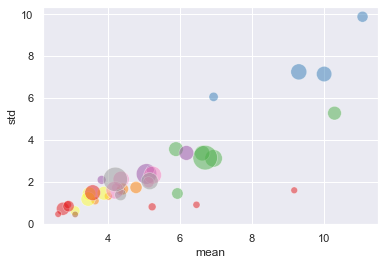

In [92]:
sns.scatterplot(data=lpk2_agg, x='mean', y='std', hue='lpk1',
                 size='count',sizes=(40, 600), alpha=0.5, palette='Set1', legend=False);